
# Computer Vision
## Session 06a
### Build ArcFace Model



In [2]:
# Import some libraries
import os

import numpy as np

import pandas as pd

import cv2

import matplotlib.pyplot as plt

from deepface.commons import functions, distance as dst

from util import ArcFace

import tensorflow as tf

%matplotlib inline

# %matplotlib notebook

2023-01-05 20:09:59.874116: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 20:10:07.372023: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-05 20:10:10.062178: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dai/directory_env/environment1/lib/python3.10/site-packages/cv2/../../lib64:


In [3]:
# Some basic parameters
inpDir = '../input'
outDir = '../output'
dataDir = 'face_recog/arc_faces'

RANDOM_STATE = 24

np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# rgb for blue color
RGB_BLUE = (15, 82, 186)

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 9),
          'axes.labelsize': 'medium',
          'axes.titlesize':'medium',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = 'brg'

plt.rcParams.update(params)

In [4]:
def fn_read_image(fileName):
    '''
    Args:
        fileName : Path of image file to read
    returns:
        im: image in cv2 format
        rgbIm: image in RGB format
    
    '''
    imgPath = os.path.join(inpDir, dataDir, fileName)
    
    # Read image file
    im = cv2.imread(imgPath, cv2.IMREAD_COLOR)
    
    
    if im is None:
        print('Could not open or find the image:', fileName)
        exit(0)
    else:
        # convert to RGB image
        rgbIm = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
        return im, rgbIm

    
def fn_plot_one_img(im):
    
    '''
    Args:
        im : image to display and save
    
    '''
    # showing image
    plt.imshow(im)
    plt.axis('off')
    plt.savefig(os.path.join(outDir, imgFileName))
        
def fn_plot_images(im_lst):
    '''
    Args:
        img_list: list of images
    '''
    nRows = 1
    nCols = len(im_lst)
    
    
    fig, axes = plt.subplots(nRows, nCols)
    
    for i in range(nCols):
        axes[i].imshow(im_lst[i]['img'], cmap = im_lst[i]['cmap'])
        axes[i].set_title(im_lst[i]['name'])

        axes[i].set_xticklabels([]);
        axes[i].set_yticklabels([]);

                
    plt.tight_layout()

In [5]:
model = ArcFace.loadModel()

2023-01-05 20:12:15.702162: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dai/directory_env/environment1/lib/python3.10/site-packages/cv2/../../lib64:
2023-01-05 20:12:15.702197: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-05 20:12:15.702221: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dai-Precision-7820-Tower): /proc/driver/nvidia/version does not exist
2023-01-05 20:12:15.705803: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operat

In [6]:
model.summary()

Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 114, 114, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  1728        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

 conv2_block3_1_prelu (PReLU)   (None, 56, 56, 64)   64          ['conv2_block3_2_bn[0][0]']      
                                                                                                  
 conv2_block3_2_pad (ZeroPaddin  (None, 58, 58, 64)  0           ['conv2_block3_1_prelu[0][0]']   
 g2D)                                                                                             
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36864       ['conv2_block3_2_pad[0][0]']     
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_add (Add)         (None, 28, 28, 128)  0           ['conv3_block2_add[0][0]',       
                                                                  'conv3_block3_3_bn[0][0]']      
                                                                                                  
 conv3_block4_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_add[0][0]']       
 ization)                                                                                         
                                                                                                  
 conv3_blo

                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_add[0][0]']       
 ization)                                                                                         
                                                                                                  
 conv4_block3_1_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block3_1_bn[0][0]']      
 g2D)                                                                                             
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 14, 14, 256)  589824      ['conv4_block3_1_pad[0][0]']     
                                                                                                  
 conv4_block3_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block3_1_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block6_1_prelu (PReLU)   (None, 14, 14, 256)  256         ['conv4_block6_2_bn[0][0]']      
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_prelu[0][0]']   
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 14, 14, 256)  589824      ['conv4_block6_2_pad[0][0]']     
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_2_conv[0][0]']    
 ization)                                                                                         
          

 conv5_block3_2_conv (Conv2D)   (None, 7, 7, 512)    2359296     ['conv5_block3_2_pad[0][0]']     
                                                                                                  
 conv5_block3_3_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block3_add (Add)         (None, 7, 7, 512)    0           ['conv5_block2_add[0][0]',       
                                                                  'conv5_block3_3_bn[0][0]']      
                                                                                                  
 batch_normalization (BatchNorm  (None, 7, 7, 512)   2048        ['conv5_block3_add[0][0]']       
 alization)                                                                                       
          

In [7]:
# loads models from following path
model.load_weights("/home/dai/directory_env/models/deepface/weights/arcface_weights.h5")

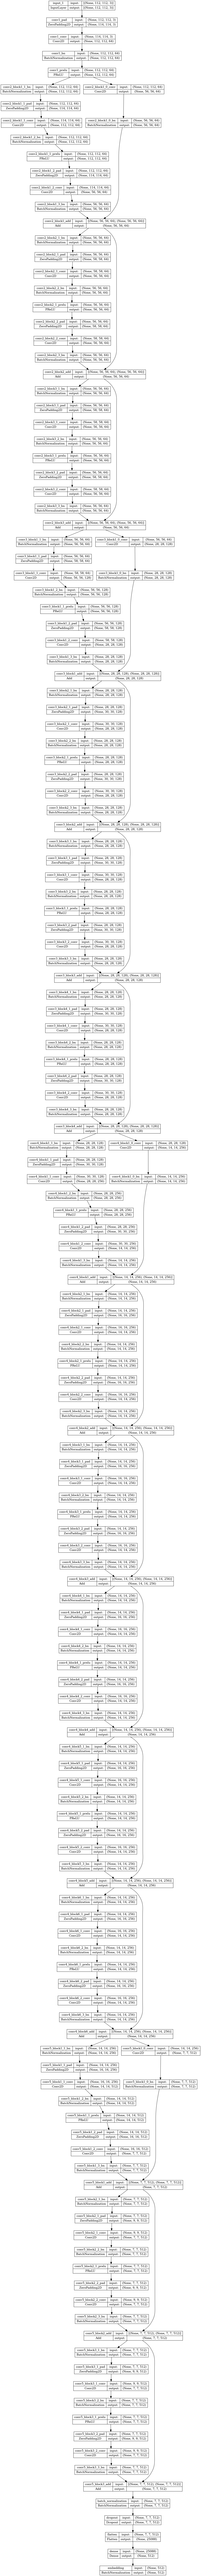

In [8]:
tf.keras.utils.plot_model(model, os.path.join(outDir, "ArcFace.png"), show_shapes=True)

In [9]:
print("ArcFace expects ",model.layers[0].input_shape[0][1:]," inputs")
print("and it represents faces as ", model.layers[-1].output_shape[1:]," dimensional vectors")

ArcFace expects  (112, 112, 3)  inputs
and it represents faces as  (512,)  dimensional vectors


In [10]:
target_size = model.layers[0].input_shape[0][1:3]

In [11]:
target_size

(112, 112)

## Stages of Pipeline

A modern face recognition pipeline consists of 4 common stages: 
- detect, 
- align, 
- represent and
- verify. 

ArcFace model handles **representation**. we will apply **detection** and **alignment** within deepface.

In [12]:
img1 = 'tom158337153.jpg'
img2 = 'tom-cruise2.jpg'
img3 = 'tom-cruise1.jpg'
img4 = 'charlie-sheen-01.jpg'
img5 = 'charlie-sheen-02.jpg'

img1Path = os.path.join(inpDir, dataDir, img1)
img2Path = os.path.join(inpDir, dataDir, img2)
img3Path = os.path.join(inpDir, dataDir, img3)
img4Path = os.path.join(inpDir, dataDir, img4)
img5Path = os.path.join(inpDir, dataDir, img5)

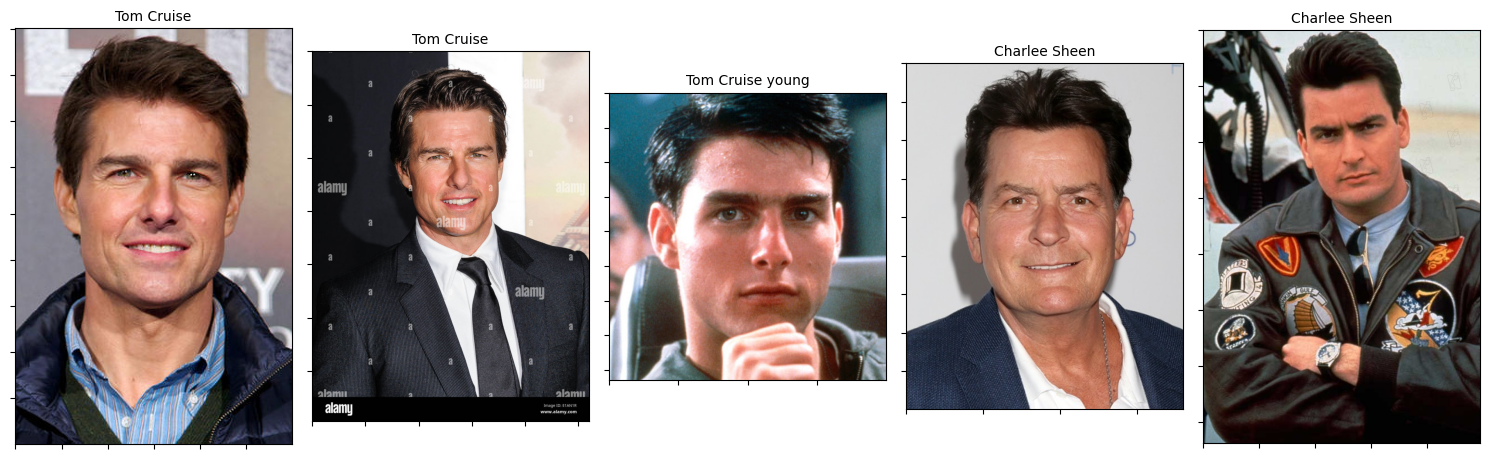

In [13]:
srcImg1, rgbImg1 =  fn_read_image(img1)
srcImg2, rgbImg2 =  fn_read_image(img2)
srcImg3, rgbImg3 =  fn_read_image(img3)
srcImg4, rgbImg4 =  fn_read_image(img4)
srcImg5, rgbImg5 =  fn_read_image(img5)

img_lst = [{'img': rgbImg1, 'name': 'Tom Cruise','cmap' : CMAP},
           {'img': rgbImg2, 'name': 'Tom Cruise','cmap' : CMAP},
           {'img': rgbImg3, 'name': 'Tom Cruise young','cmap' : CMAP},
           {'img': rgbImg4, 'name': 'Charlee Sheen','cmap' : CMAP},
           {'img': rgbImg5, 'name': 'Charlee Sheen','cmap' : CMAP}]

fn_plot_images(img_lst)

In [14]:
detector_backend = 'opencv'

img1 = functions.preprocess_face(img1Path, target_size = target_size, detector_backend = detector_backend)
img2 = functions.preprocess_face(img2Path, target_size = target_size, detector_backend = detector_backend)
img3 = functions.preprocess_face(img3Path, target_size = target_size, detector_backend = detector_backend)
img4 = functions.preprocess_face(img4Path, target_size = target_size, detector_backend = detector_backend)
img5 = functions.preprocess_face(img5Path, target_size = target_size, detector_backend = detector_backend)


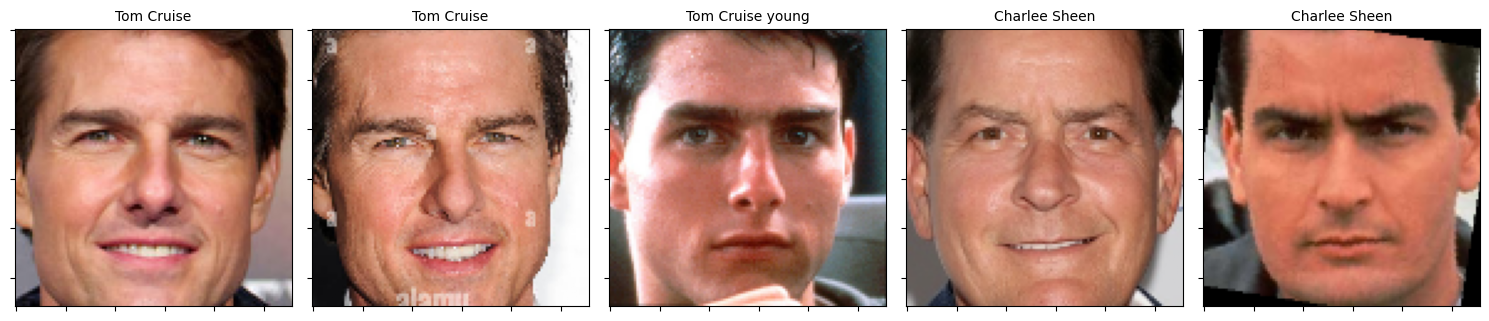

In [15]:
img_lst = [{'img': img1[0][:,:,::-1], 'name': 'Tom Cruise','cmap' : CMAP},
           {'img': img2[0][:,:,::-1], 'name': 'Tom Cruise','cmap' : CMAP},
           {'img': img3[0][:,:,::-1], 'name': 'Tom Cruise young','cmap' : CMAP},
           {'img': img4[0][:,:,::-1], 'name': 'Charlee Sheen','cmap' : CMAP},
           {'img': img5[0][:,:,::-1], 'name': 'Charlee Sheen','cmap' : CMAP}]

fn_plot_images(img_lst)

## Represent and verify

ArcFace is responsible for representing faces as 512 dimensional vectors

We will find distance between embeddings to verify they are same person or different persons

## Similarity

Face recognition models are regular convolutional neural networks and they are responsible to represent faces as vectors. We expect that a face pair of same person should be more similar than a face pair of different persons.

Similarity could be calculated by different metrics such as `Cosine Similarity`, `Euclidean Distance` and `L2` form. The default configuration uses cosine similarity.

**Recomendation** :`Euclidean L2` form seems to be more stable than cosine and regular Euclidean distance based on experiments.

In [16]:
def findThreshold(metric):
    
    # Cosine difference
    if metric == 'cosine':
        return 0.6871912959056619
    
    # Manhattan Distance (mods)
    elif metric == 'euclidean':
        return 4.1591468986978075
    
    # straightline difference (squares of mods)
    elif metric == 'euclidean_l2':
        return 1.1315718048269017

In [19]:
#metric = 'euclidean'
metric = 'cosine'
#metric = 'euclidean_l2'

In [20]:
def verify(img1, img2):
    
    #representation
    
    img1_embedding = model.predict(img1)[0]
    img2_embedding = model.predict(img2)[0]

    if metric == 'cosine':
        distance = dst.findCosineDistance(img1_embedding, img2_embedding)
    elif metric == 'euclidean':
        distance = dst.findEuclideanDistance(img1_embedding, img2_embedding)
    elif metric == 'euclidean_l2':
        distance = dst.findEuclideanDistance(dst.l2_normalize(img1_embedding), dst.l2_normalize(img2_embedding))
    
    #------------------------------
    #verification
    
    threshold = findThreshold(metric)
    
    if distance <= threshold:
        print("They are same person")
    else:
        print("They are different persons")
    
    print("Distance is ",round(distance, 2)," whereas as expected max threshold is ",round(threshold, 2))
    
    #------------------------------
    #display
    
    img_lst = [{'img': img1[0][:,:,::-1], 'name': 'Person 1','cmap' : CMAP},
               {'img': img2[0][:,:,::-1], 'name': 'Person 2','cmap' : CMAP}]

    fn_plot_images(img_lst)
    

## True positive pairs

### Euclidean

1/1 [==============================] - 0s 96ms/step
They are same person
Distance is  3.12  whereas as expected max threshold is  4.16


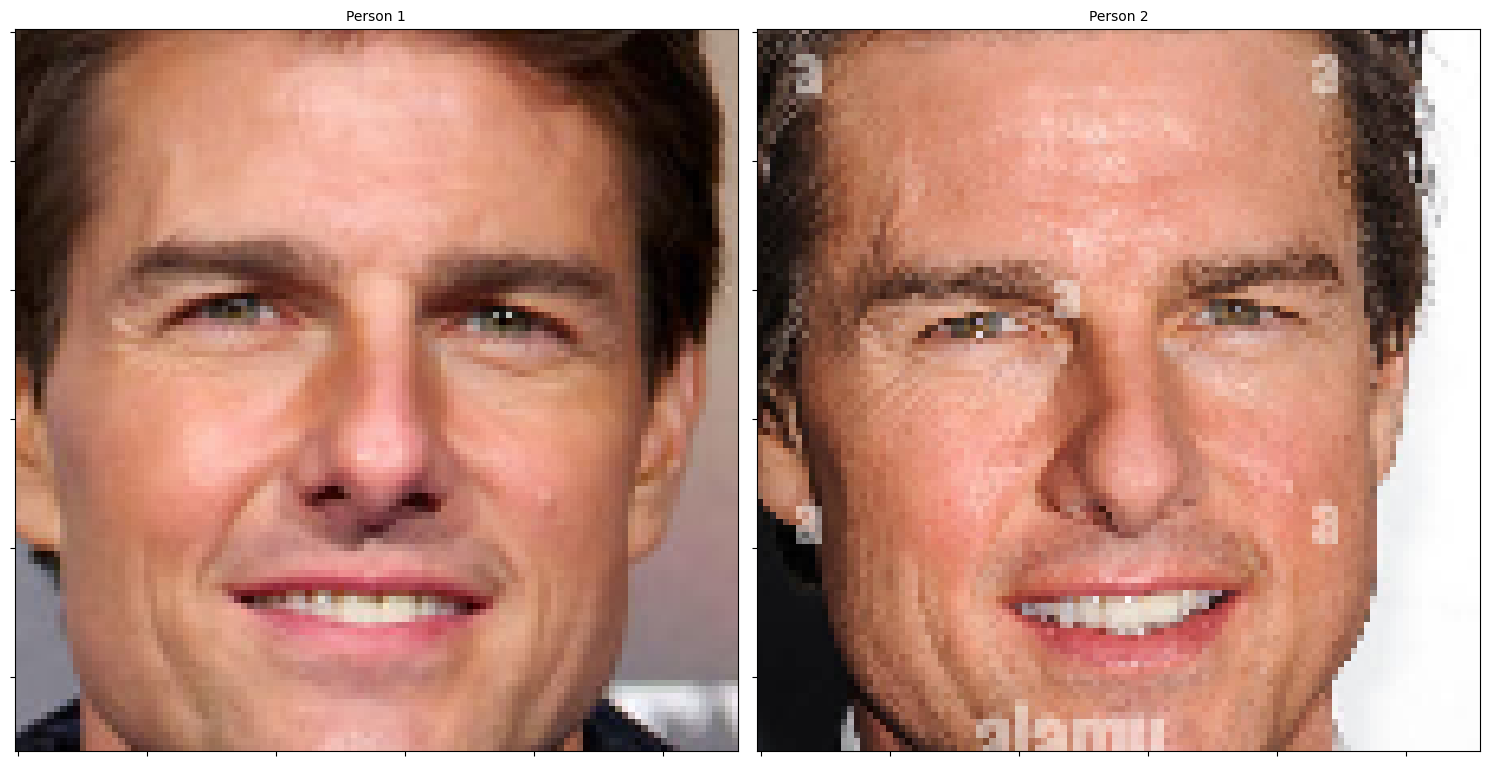

In [21]:
metric = 'euclidean'

verify(img1, img2)

1/1 [==============================] - 0s 98ms/step
They are different persons
Distance is  4.22  whereas as expected max threshold is  4.16


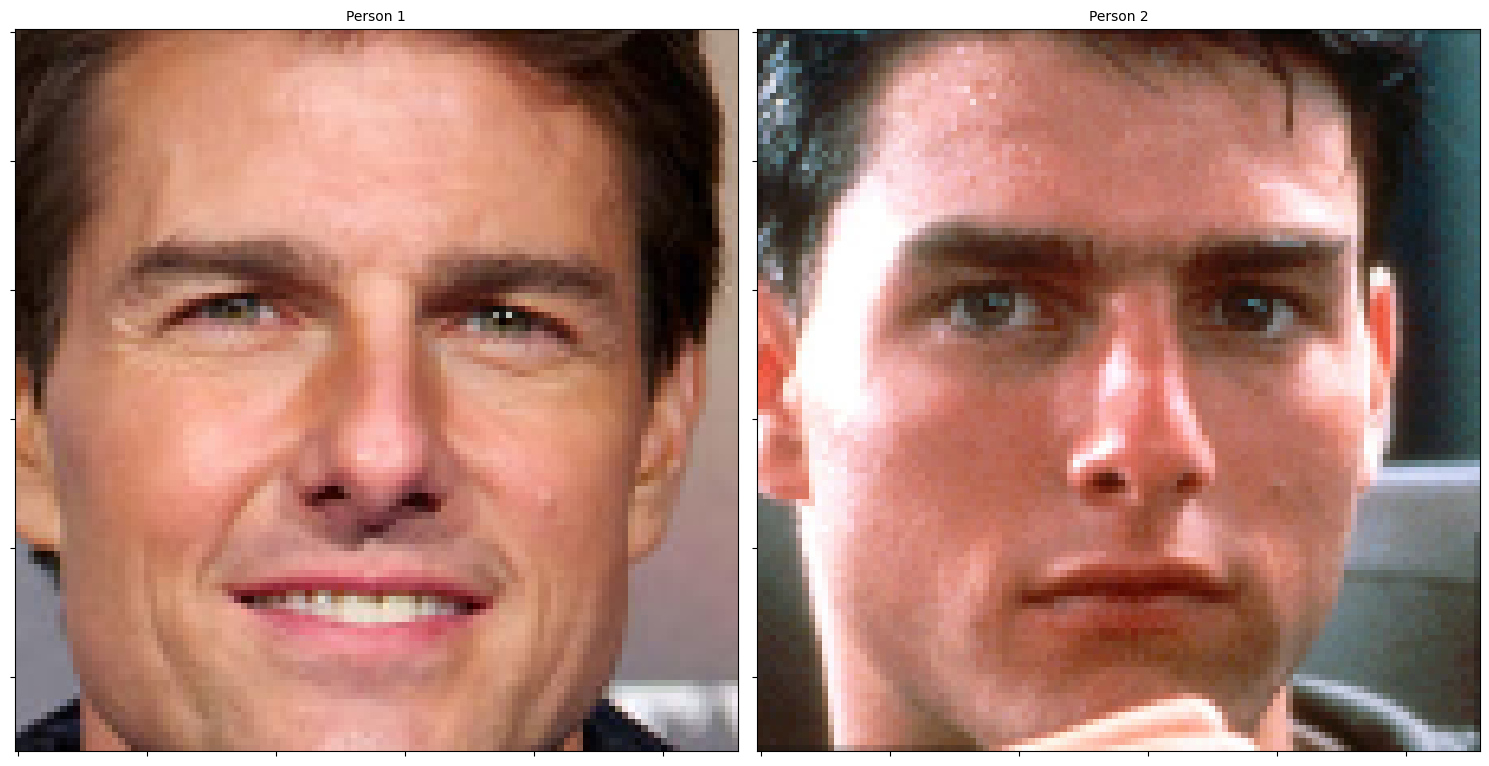

In [22]:
verify(img1, img3)

### Cosine Similarity

1/1 [==============================] - 0s 94ms/step
They are same person
Distance is  0.31  whereas as expected max threshold is  0.69


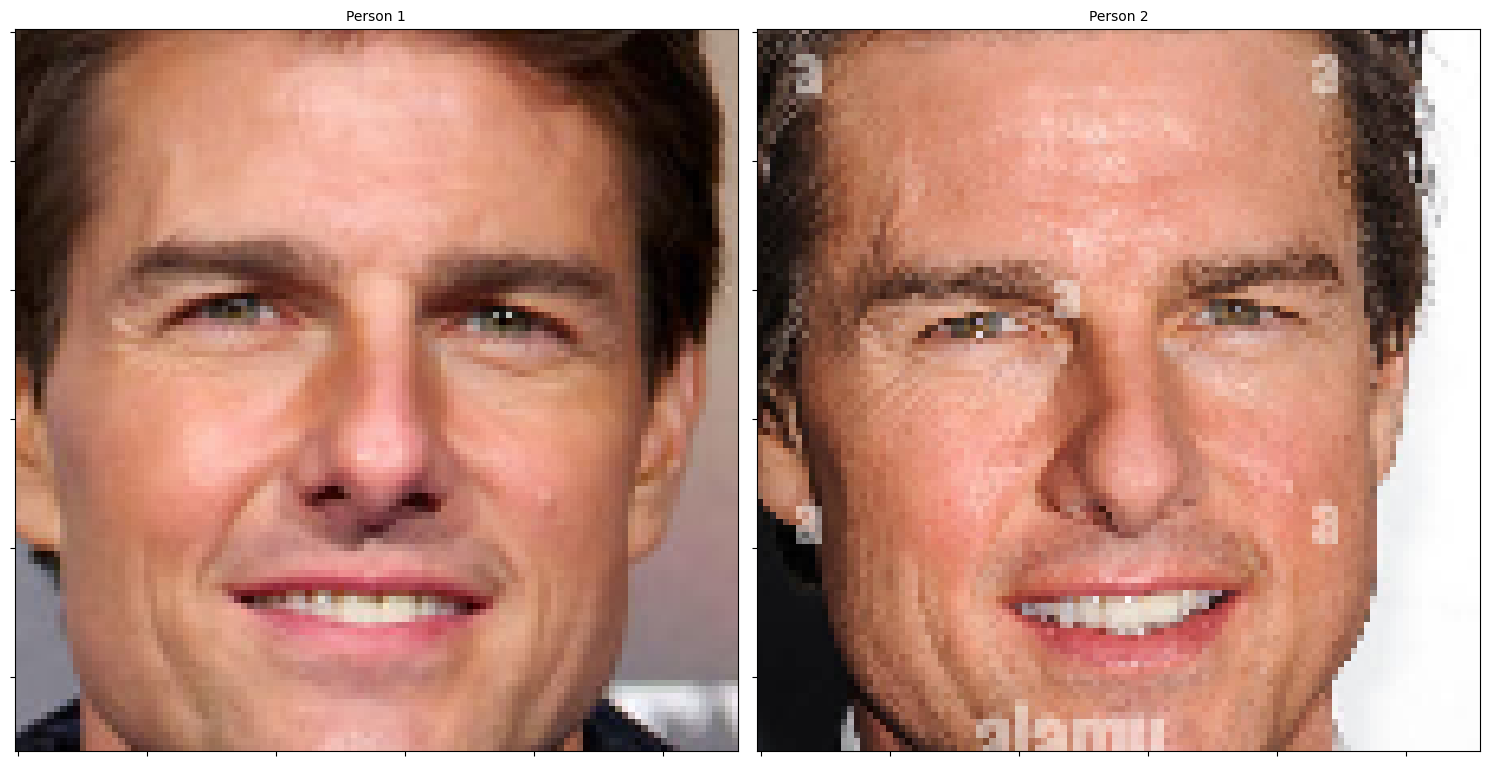

In [23]:
metric = 'cosine'

verify(img1, img2)

1/1 [==============================] - 0s 95ms/step
They are same person
Distance is  0.52  whereas as expected max threshold is  0.69


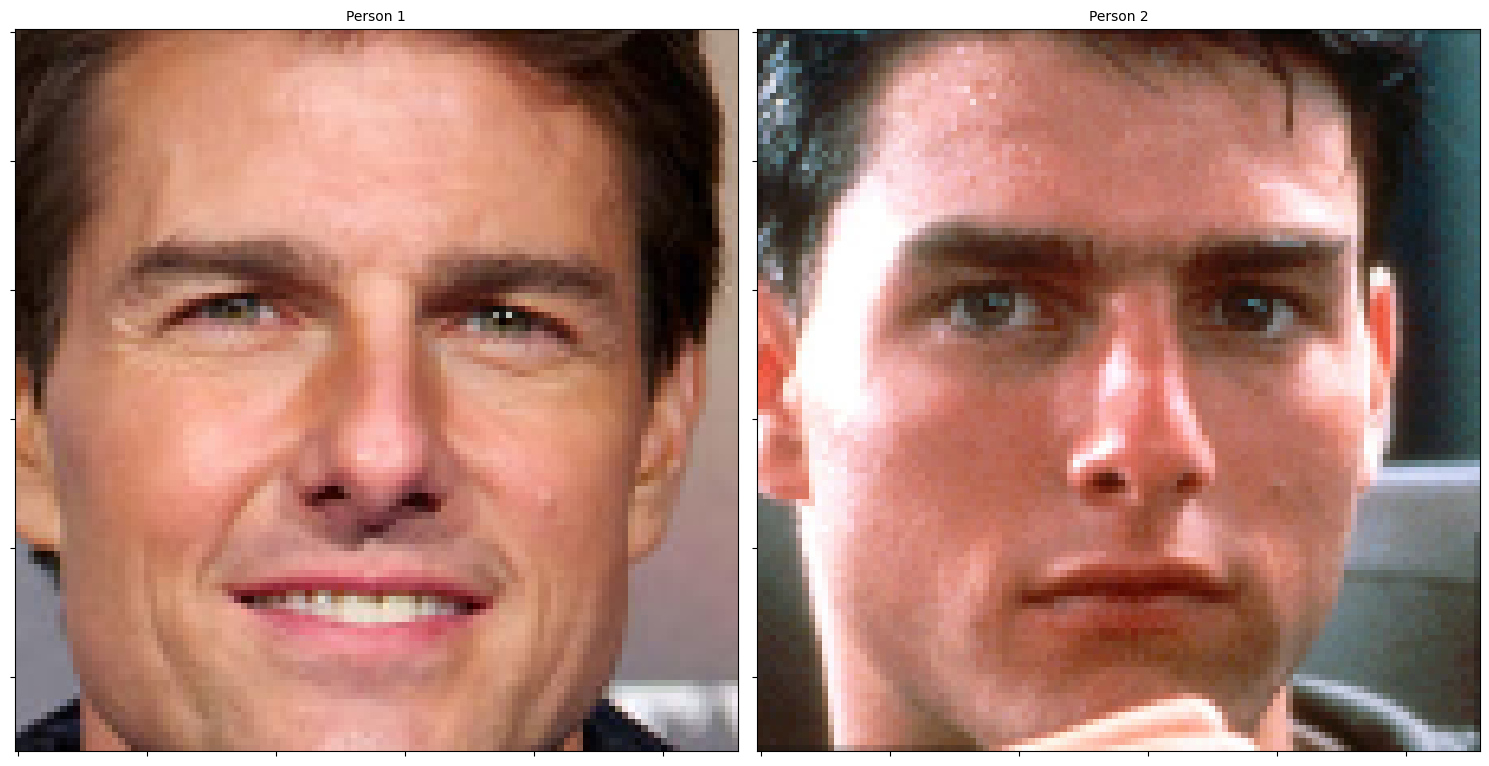

In [24]:
verify(img1, img3)

### L2 Norm

1/1 [==============================] - 0s 97ms/step
They are same person
Distance is  0.78  whereas as expected max threshold is  1.13


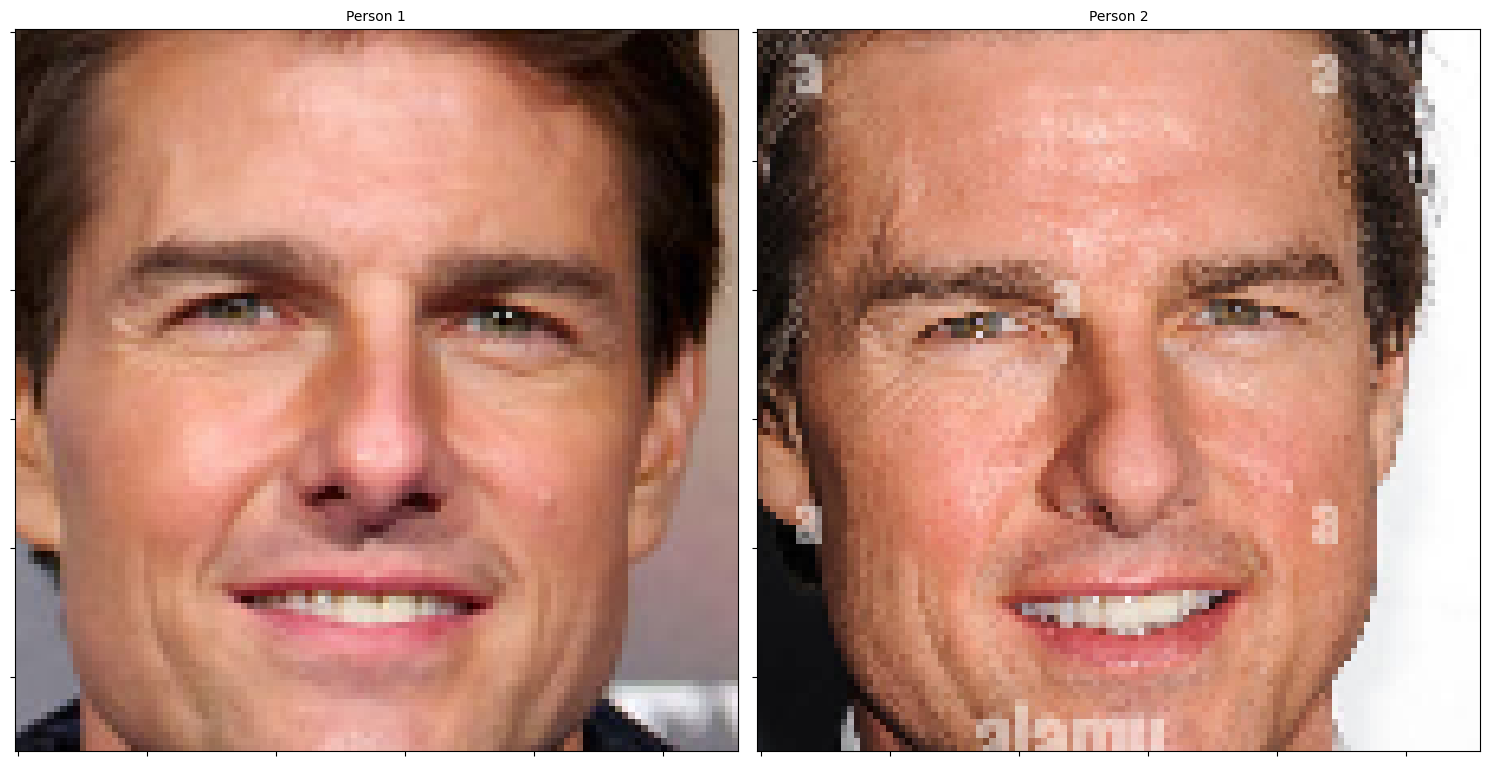

In [25]:
metric = 'euclidean_l2'

verify(img1, img2)

1/1 [==============================] - 0s 97ms/step
They are same person
Distance is  1.02  whereas as expected max threshold is  1.13


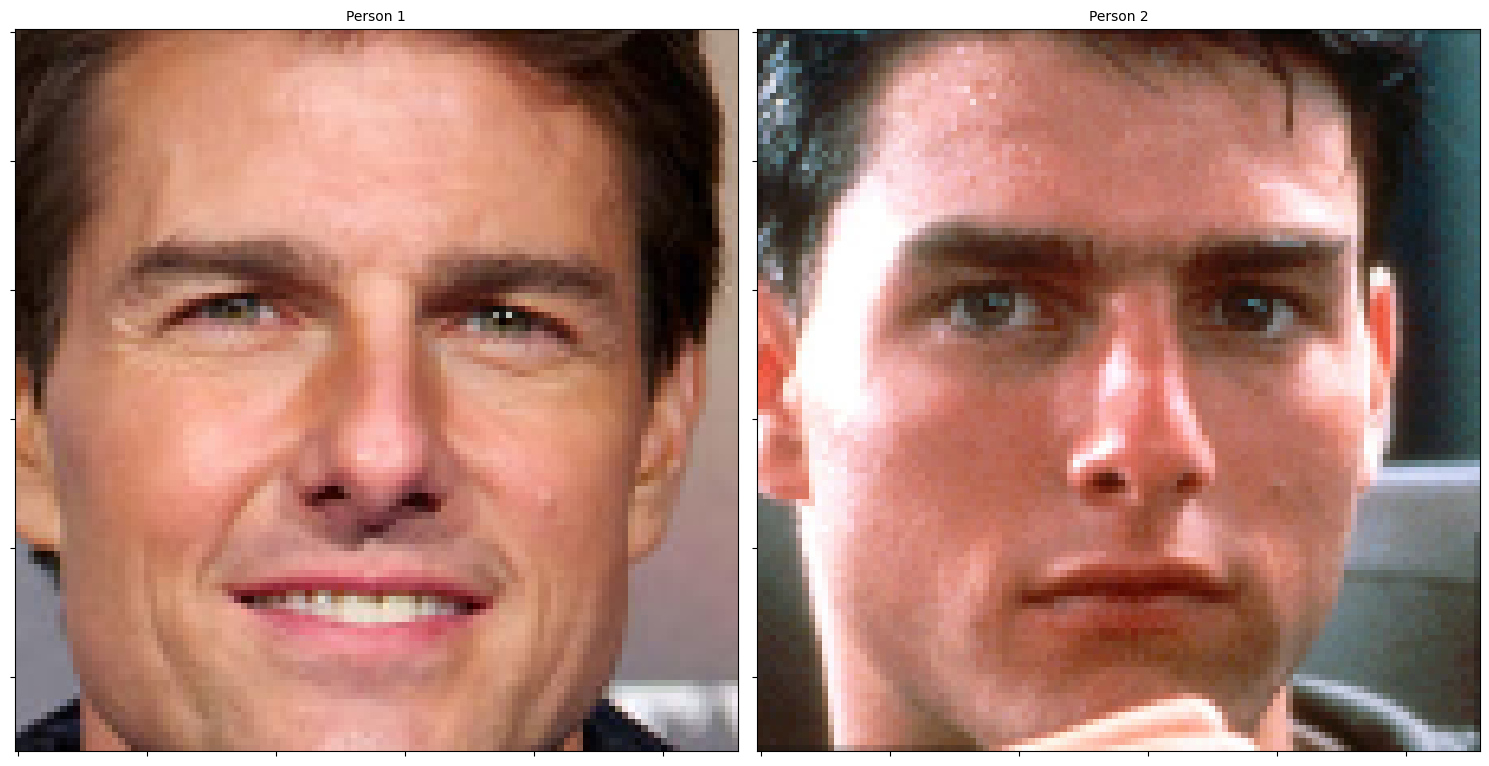

In [26]:
verify(img1, img3)

1/1 [==============================] - 0s 97ms/step
They are same person
Distance is  1.09  whereas as expected max threshold is  1.13


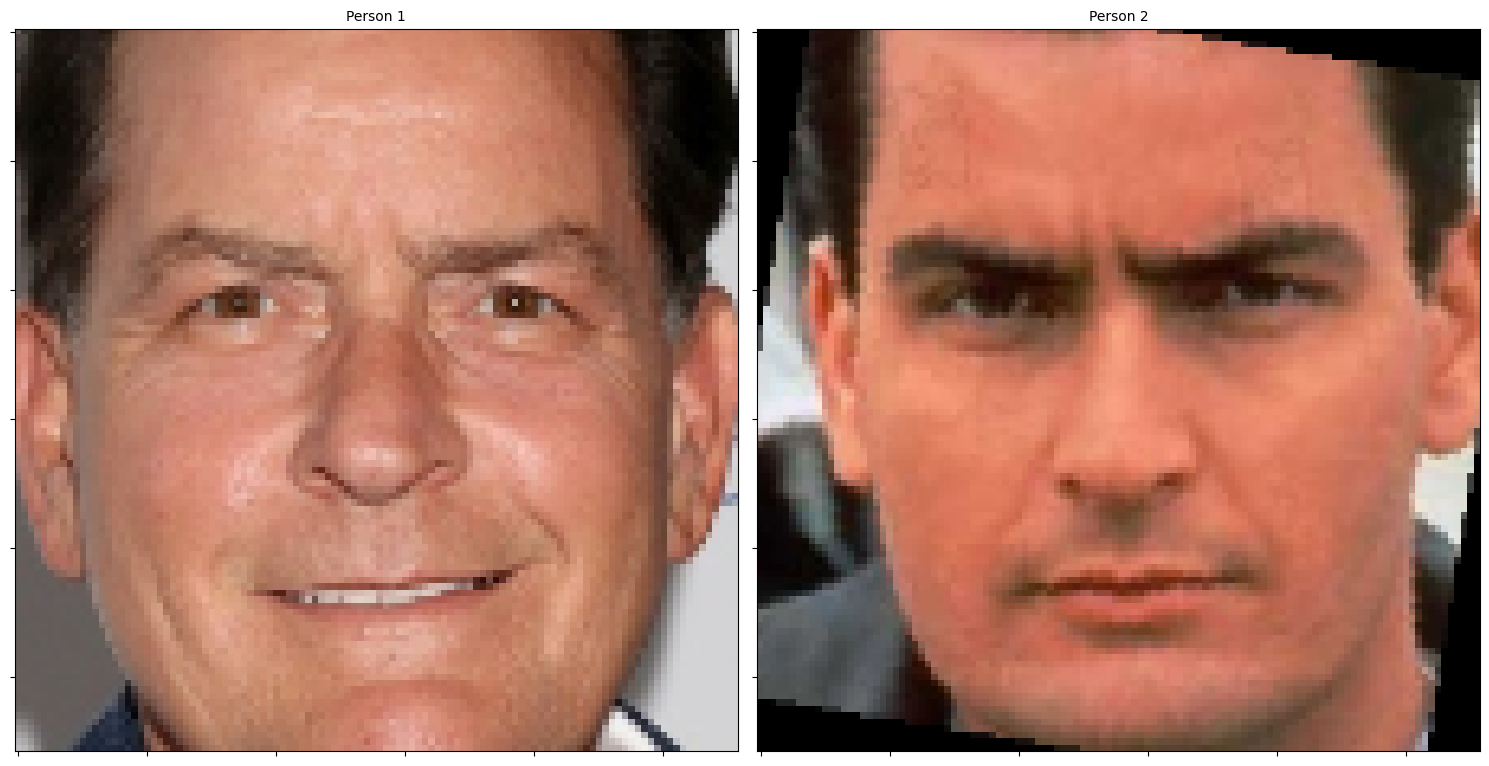

In [27]:
verify(img4, img5)

## True negative pairs

1/1 [==============================] - 0s 96ms/step
They are different persons
Distance is  5.3  whereas as expected max threshold is  4.16


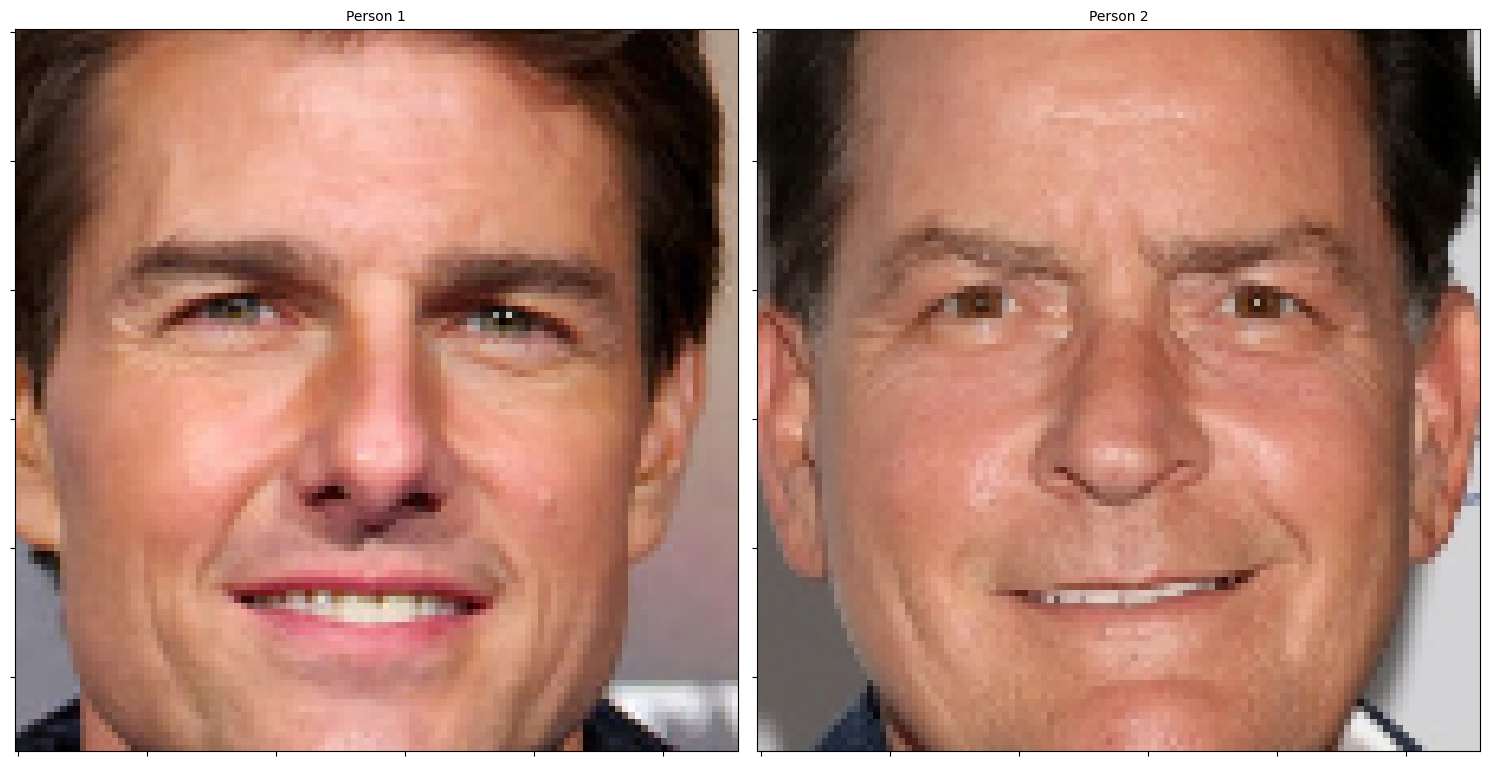

In [28]:
metric = 'euclidean'

verify(img1, img4)

1/1 [==============================] - 0s 93ms/step
They are different persons
Distance is  0.84  whereas as expected max threshold is  0.69


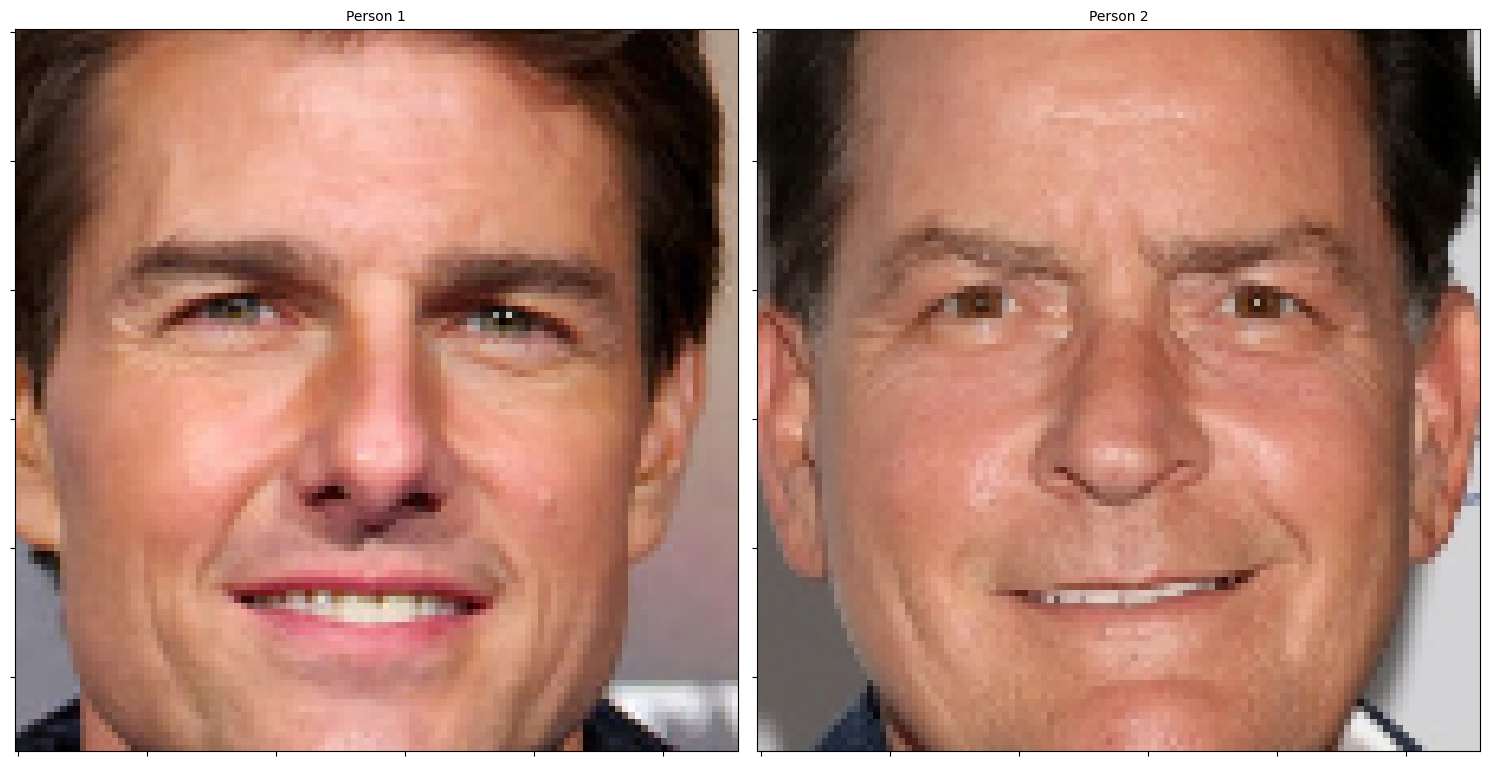

In [29]:
metric = 'cosine'

verify(img1, img4)

1/1 [==============================] - 0s 95ms/step
They are different persons
Distance is  1.3  whereas as expected max threshold is  1.13


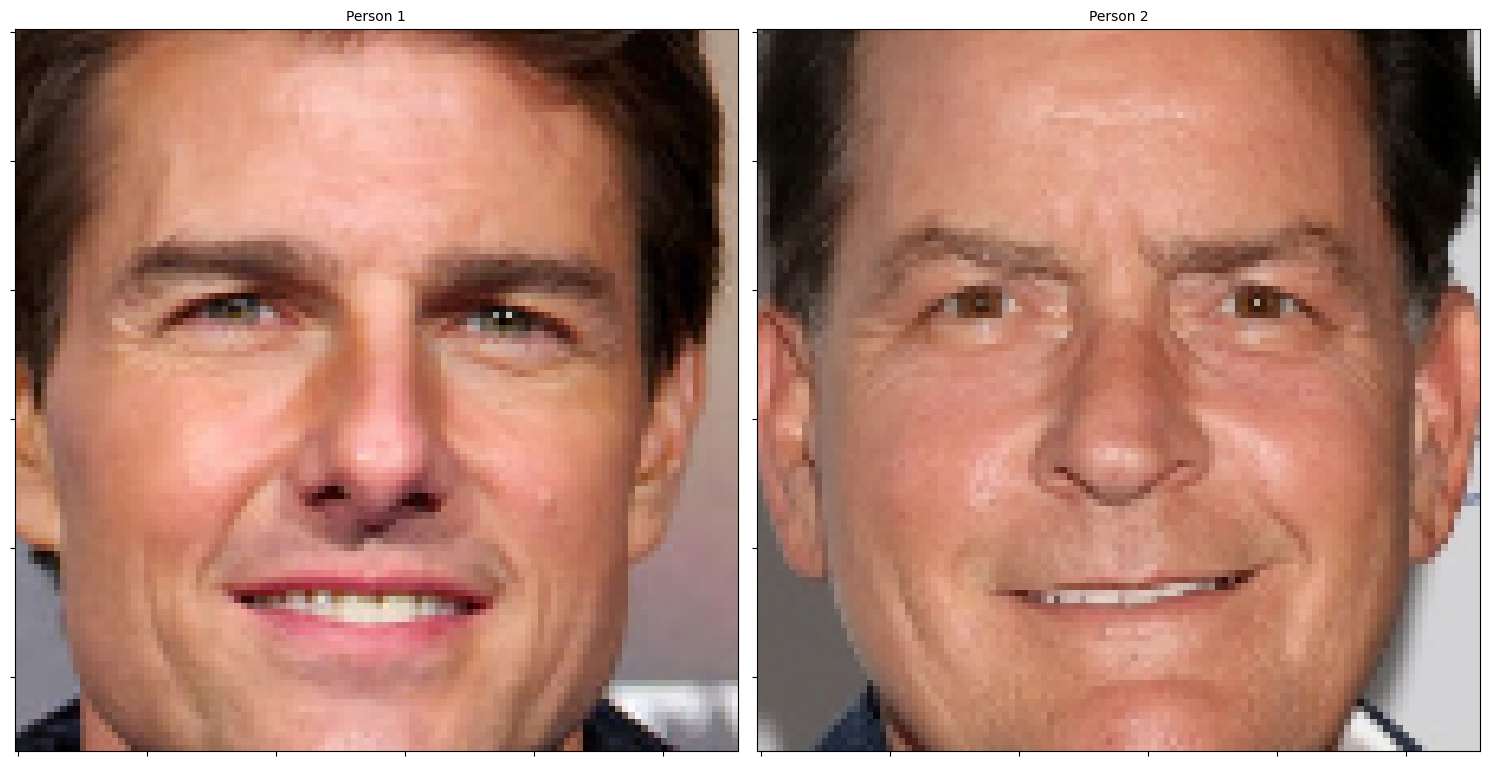

In [30]:
metric = 'euclidean_l2'

verify(img1, img4)

1/1 [==============================] - 0s 93ms/step
They are different persons
Distance is  1.15  whereas as expected max threshold is  1.13


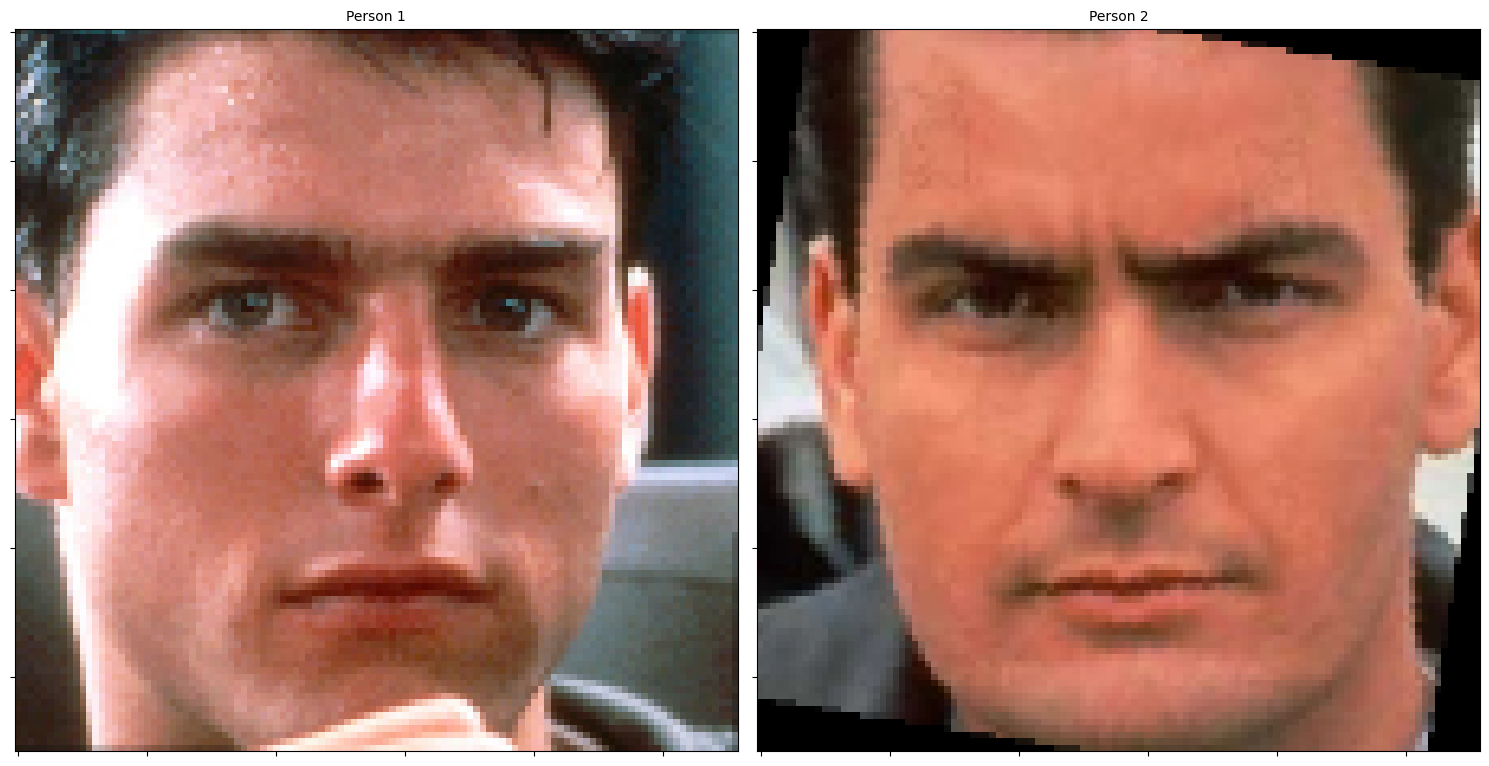

In [31]:
verify(img3, img5)